[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mktmi/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to C:\Users\mktmi/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Logistic Regression Accuracy: 0.36
SVM Accuracy: 0.35
Naive Bayes Accuracy: 0.32
Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.35      0.37      0.36      1751
           1       0.37      0.35      0.36      1825

    accuracy                           0.36      3576
   macro avg       0.36      0.36      0.36      3576
weighted avg       0.36      0.36      0.36      3576

SVM Report:
              precision    recall  f1-score   support

           0       0.34      0.36      0.35      1751
           1       0.36      0.34      0.35      1825

    accuracy                           0.35      3576
   macro avg       0.35      0.35      0.35      3576
weighted avg       0.35      0.35      0.35      3576

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.33      0.37      0.35      1751
           1       0.31      0.27      0.29      1825

    accuracy                           0.

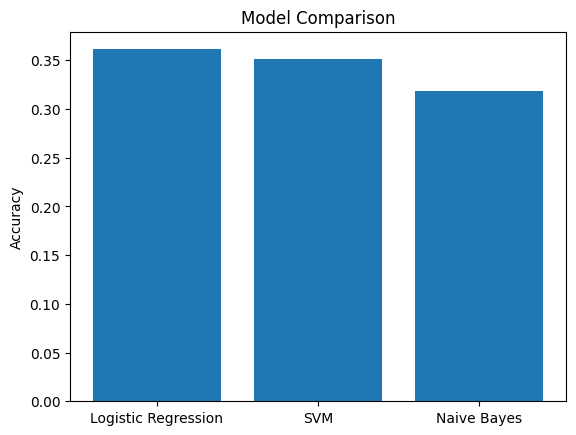

Sentence: 2	Yo no creo que a nadie le haya encantado un pene flácido . 
Prediction: Human

Sentence: 2	No va a resolver sus problemas de crédito o mejorar su relación con su padre . 
Prediction: Human

Sentence: 2	Te encantará este ! 
Prediction: Machine

Sentence: 2	Yo estaba a volar a un aeropuerto varias horas de distancia , alquilar un coche , conducir a un lugar remoto en Canadá , y desactivar el teléfono . 
Prediction: Human

Sentence: 2	( Maid En Manhattan , The Wedding Planner , Jersey Girl , Monster In Law , , Gigli , The Back-Up Plan , ¿ Qué esperar cuando se está esperando ) 
Prediction: Machine

Sentence: 2	Mi padre llegó con la primera ola de fuerzas aliadas en el día D , 6 de junio 1944 . 
Prediction: Human

Sentence: 2	Y podemos todos estar de acuerdo que los envases no miente ? 
Prediction: Human

Sentence: 2	Por supuesto , todos los compañeros de reparto de Casey en Happy Endings estaban allí también , como Elisha Cuthbert y Damon Wayans Jr . 
Prediction: Machine

Sent

In [1]:
# Import necessary libraries
import nltk
import os
import spacy
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression

# Step 1: NLTK Setup - Define custom download directory
nltk_data_dir = os.path.expanduser('~/nltk_data')  # or specify any other directory
if not os.path.exists(nltk_data_dir):
    os.makedirs(nltk_data_dir)

# Add the directory to NLTK's path
nltk.data.path.append(nltk_data_dir)

# Download necessary NLTK resources
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('punkt', download_dir=nltk_data_dir)

# Step 2: Load the spaCy Spanish model
spacy_nlp = spacy.load("es_core_news_sm")

# Step 3: Data Preprocessing - Tokenization, stopword removal, and lemmatization using spaCy
def preprocess_text(text):
    doc = spacy_nlp(text)  # Process the sentence using spaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]  # Lemmatize, remove stopwords & punctuation
    return " ".join(tokens)  # Return the preprocessed text as a string

def preprocess_data(text_data):
    return [preprocess_text(sentence) for sentence in text_data]

# Step 4: Load the dataset (Assuming the data is tab-separated with label and sentence)
def load_data(file_path):
    text_data, labels = [], []
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            label, sentence = line.split('\t', 1)
            labels.append(int(label))
            text_data.append(sentence)
    return text_data, labels

# Load and preprocess the dataset
text_data, labels = load_data('TRAINING_DATA.txt')
preprocessed_data = preprocess_data(text_data)

# Step 5: Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer()  # Using TF-IDF for feature extraction
X = vectorizer.fit_transform(preprocessed_data)  # Convert the text into numerical features
y = labels  # Labels (0 for machine-translated, 1 for human-translated)

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Model Selection
# Logistic Regression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.2f}")

# Support Vector Machine (SVM)
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.2f}")

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb:.2f}")

# Step 8: Evaluate the Models using classification report
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

print("SVM Report:")
print(classification_report(y_test, y_pred_svm))

print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))

# Step 9: Visualization - Compare model performances
models = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracies = [accuracy_logreg, accuracy_svm, accuracy_nb]

plt.bar(models, accuracies)
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()

# Step 10: Classification for New Data (REAL_DATA.txt)
def classify_new_data(new_data, model, vectorizer):
    preprocessed_new_data = preprocess_data(new_data)  # Preprocess the new data
    X_new = vectorizer.transform(preprocessed_new_data)  # Convert the new data into numerical features using the same vectorizer
    return model.predict(X_new)

# Load new data (REAL_DATA.txt)
with open('REAL_DATA.txt', 'r', encoding='utf-8') as f:
    new_data = f.readlines()  # Assume each line is a new sentence to classify

# Use the best model (you can change it based on the best-performing model)
new_predictions = classify_new_data(new_data, logreg_model, vectorizer)

# Output predictions
for i, prediction in enumerate(new_predictions):
    translation_type = "Human" if prediction == 1 else "Machine"
    print(f"Sentence: {new_data[i].strip()} \nPrediction: {translation_type}\n")
